<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:** Коряков Иван Владимирович

**Забавный факт о себе:** я не ботаю

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 13.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

SSLError: [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2578)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [8]:
df_ria = pd.read_csv('/content/drive/MyDrive/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [9]:
df_vk = pd.read_csv('/content/drive/MyDrive/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [8]:
df_comments = pd.read_csv('/content/drive/MyDrive/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

<ipython-input-8-6e01acb96ada>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/content/drive/MyDrive/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [10]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [11]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [12]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [13]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [14]:
df_ria.target_tags.values[:3]

array([list([816, 564, 291]), list([636, 583, 291]), list([342])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [17]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [18]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [19]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [20]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [21]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [22]:
df_vk['title_clean'] = df_vk.title.apply(normalise_text)

df_ria['snippet_clean'] = df_ria.snippet.apply(lambda x: normalise_text(x) if not pd.isnull(x) else '#UNKN')
df_vk['snippet_clean'] = df_vk.snippet.apply(lambda x: normalise_text(x) if not pd.isnull(x) else '#UNKN')

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [23]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [23]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [24]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [24]:
df_test = df[df['date'] >= '2018-12-01']
df_val = df[(df['date'] >= '2018-10-01') & (df['date'] <= '2018-11-30')]
df_train = df[df['date'] <= '2018-09-30']

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [25]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[127]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[311, 291]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[389, 389, 801, 602, 594]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[127]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[311, 291]"


Напишем датасет для поставки данных в нейросеть.


In [26]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        return (self.X_title[idx, :], self.y[idx])


__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [27]:
class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)
       if snippet is not None and max_snippet_len is not None:
          self.X_snippet = self.create_text(snippet, max_snippet_len)
       else:
          self.X_snippet = None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet is not None:
            return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])
        else:
            return (self.X_title[idx, :], self.y[idx])

Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [29]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [30]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [29]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [30]:
!pip3 install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 56.4 MB/s eta 0:00:00


In [31]:
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()
wandb_logger = WandbLogger(log_model = 'all', project = 'homework')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [32]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

Обучим модель.

In [36]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module = TrainLightningModule(model_baseline, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleClassifier | 3.5 M  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.906    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▆▆▆▆▆▆▆█████████
train_loss,██▆▇▄▆▅▆▆▆▃▄▅▄▅▄▃▃▄▃▄▃▂▆▃▄▂▂▄▂▁▁▃▄▃▂▂▃▁▃
trainer/global_step,▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
val_loss,█▄▂▁▁
epoch,4
train_loss,9.01608
trainer/global_step,10694
val_loss,10.72173


__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [44]:
MAX_SNIPPET_LEN = 30

train_dataset_snippet = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, MAX_SNIPPET_LEN)
val_dataset_snippet = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPET_LEN)
test_dataset_snippet = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPET_LEN)

In [45]:
train_dataloader_snippet = DataLoader(train_dataset_snippet, shuffle=True, batch_size=64, num_workers=4)
val_dataloader_snippet = DataLoader(val_dataset_snippet, shuffle=False, batch_size=4096, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [46]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifierSnippet(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(2*embedding_dim, output_dim)

    def forward(self, title, snippet):
        embedded_title = self.embedding(title)
        embedded_title = embedded_title.mean(dim=1)

        embedded_snippet = self.embedding(snippet)
        embedded_snippet = embedded_snippet.mean(dim=1)

        return self.fc(torch.cat((embedded_title, embedded_snippet), dim = 1))

In [47]:
import pytorch_lightning as pl

class TrainLightningModuleSnippet(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title, snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [48]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_snippet = SimpleClassifierSnippet(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_snippet = TrainLightningModuleSnippet(model_baseline_snippet, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_snippet, train_dataloader_snippet, val_dataloader_snippet)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                    | Params | Mode 
--------------------------------------------------------------
0 | model     | SimpleClassifierSnippet | 4.0 M  | train
1 | criterion | CrossEntropyLoss        | 0      | train
--------------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆█████████
train_loss,██▇▅▆▄▅▄▃▂▄▃▃▄▁▃▂▂▃▂▃▁▃▃▂▂▃▂▂▂▃▂▁▂▃▂▁▁▂▁
trainer/global_step,▁▁▁▁▁▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇████
val_loss,█▄▂▁▁
epoch,4
train_loss,7.69984
trainer/global_step,10694
val_loss,10.44018


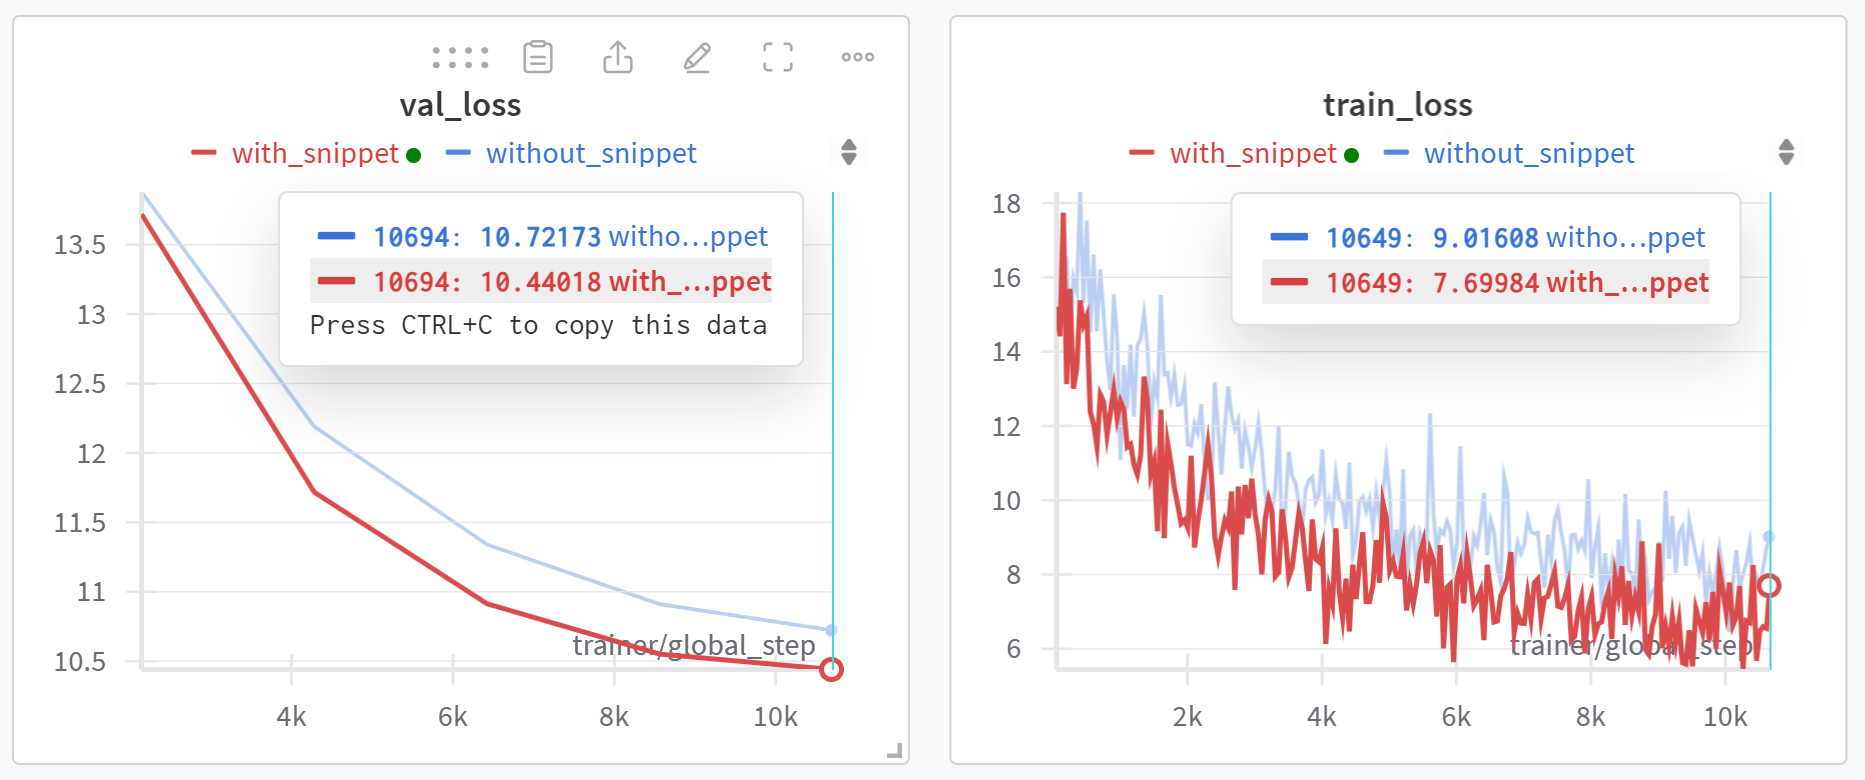

**Вывод:** По графикам видно, что модель со снипеттами показывает более хорошие результаты как на тренировочной, так и на валидационной выборках, чем модель, обученная только на титулах статьей.

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [45]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9955136179924011
Precision: 0.2892264425754547
Recall: 0.7639231085777283


In [ ]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983233213424683
Precision: 0.5200127363204956
Recall: 0.6192846894264221


In [ ]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983180165290833
Precision: 0.005402404814958572
Recall: 0.0048613399267196655


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [38]:
def get_predict(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__ В данной задаче важнее будет точность, если мы хотим быть уверены в результатах модели, поскольку она минимизирует ложноположительные предсказания. Однако полнота может быть важнее в случае, когда мы минимизируем ложноотрицательные предсказаний. Но для дальнейшего анализа результатов лучше получить небольшое, но точное множество тегов, чем большое, но содержащее ошибки.

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [50]:
def optimal_threshold(pred_probs, targets, metric, thresholds):
    best_precision = 0
    for threshold in thresholds:
        y_pred = 1*(pred_probs > threshold)
        precision = metric(targets, y_pred)

        if precision >= best_precision:
            best_precision = precision
            optimal_threshold = threshold

    return optimal_threshold, best_precision

In [ ]:
thresholds = np.arange(0, 1.01, 0.01)

In [ ]:
pred_prob_val, target_val = get_predict(train_module, val_dataset)

In [ ]:
optimal_threshold_without_snippet, best_precision_without_snippet = optimal_threshold(pred_prob_val, target_val, precision, thresholds)
optimal_threshold_without_snippet

0.13

In [ ]:
pred_prob_test, target_test = get_predict(train_module, test_dataset)
y_pred_without_snippet = 1*(pred_prob_test > optimal_threshold_without_snippet)
precision_test_without_snippet = precision(target_test, y_pred_without_snippet)
print('Точность на тестовой выборке без сниппета:', precision_test_without_snippet)

Точность на тестовой выборке без сниппета: 0.5824582576751709


In [51]:
def get_predict_snippet(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, snippet, target in dataloader:
        logit = model(title, snippet)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

In [ ]:
pred_prob_val_snippet, target_val_snippet = get_predict_snippet(train_module_snippet, val_dataset_snippet)

In [ ]:
optimal_threshold_snippet, best_precision_snippet = optimal_threshold(pred_prob_val_snippet, target_val_snippet, precision, thresholds)
optimal_threshold_snippet

0.13

In [ ]:
pred_prob_test_snippet, target_test_snippet = get_predict_snippet(train_module_snippet, test_dataset_snippet)
y_pred_snippet = 1*(pred_prob_test_snippet > optimal_threshold_snippet)
precision_test_snippet = precision(target_test_snippet, y_pred_snippet)
print('Точность на тестовой выборке со сниппетом:', precision_test_snippet)

Точность на тестовой выборке со сниппетом: 0.5937990546226501


**Вывод:** По результатам видно, что модель со сниппетами оказалась лучше, но не сильно (у нее больше максимальное значение precision)

__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [ ]:
df_oob.head()

,href,title_clean,snippet_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,#UNKN,[1443]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,#UNKN,"[253, 29]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,#UNKN,"[307, 307, 216, 28, 378]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,#UNKN,[1443]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,#UNKN,"[253, 29]"


In [ ]:
df_oob_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)

pred_prob_obb, target_obb = get_predict(train_module, df_oob_dataset)

y_pred_obb = 1*(pred_prob_obb > optimal_threshold_without_snippet)
precision_obb = precision(target_obb, y_pred_obb)
print('Точность на отложенной выборке без сниппета:', precision_obb)

Точность на отложенной выборке без сниппета: 0.5631766319274902


**Вывод:** на отложенной выборке precision падает, но незначительно (всего на 2%)

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

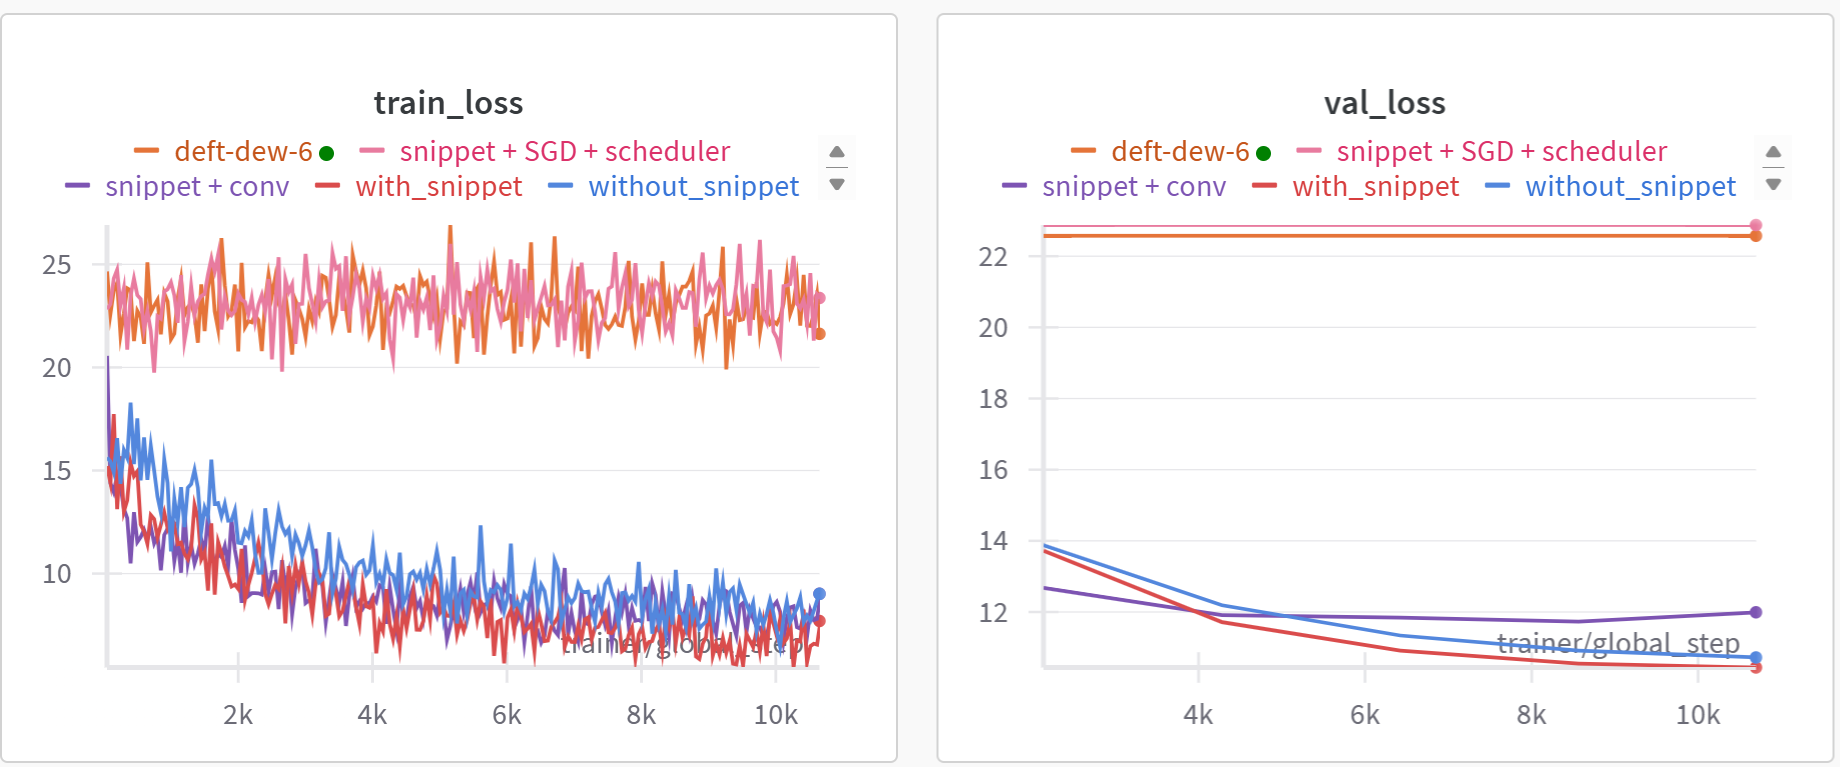

Архитектура с добавлением сверточного слоя, макс-пулинга и дропаута:

In [64]:
class SimpleClassifierSnippetWithConv1d(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1d_title = nn.Conv1d(in_channels=embedding_dim, out_channels=64, kernel_size=3)
        self.conv1d_snippet = nn.Conv1d(in_channels=embedding_dim, out_channels=64, kernel_size=3)
        self.maxpool = nn.AdaptiveMaxPool1d(1)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(2 * 64, output_dim)

    def forward(self, title, snippet):
        embedded_title = self.embedding(title)
        embedded_snippet = self.embedding(snippet)

        embedded_title = embedded_title.permute(0, 2, 1)
        embedded_snippet = embedded_snippet.permute(0, 2, 1)

        conv_title = self.conv1d_title(embedded_title)
        conv_snippet = self.conv1d_snippet(embedded_snippet)

        conv_title = F.relu(conv_title)
        conv_snippet = F.relu(conv_snippet)

        pooled_title = self.maxpool(conv_title).squeeze(2)
        pooled_snippet = self.maxpool(conv_snippet).squeeze(2)

        combined_features = torch.cat((pooled_title, pooled_snippet), dim=1)
        combined_features = self.dropout(combined_features)

        return self.fc(combined_features)

In [65]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_snippet_conv = SimpleClassifierSnippetWithConv1d(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_snippet_conv = TrainLightningModuleSnippet(model_baseline_snippet_conv, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_snippet_conv, train_dataloader_snippet, val_dataloader_snippet)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                              | Params | Mode 
------------------------------------------------------------------------
0 | model     | SimpleClassifierSnippetWithConv1d | 3.3 M  | train
1 | criterion | CrossEntropyLoss                  | 0      | train
------------------------------------------------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M     Total params
13.278    Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▃▃▃▃▅▅▅▅▅▆▆▆▆▆█████▁▁▃▃▅▅▅▅▆▆▆▆███
train_loss,█▅▄▃▄▄▄▄▄▂▃▂▂▂▂▂▄▁▂▂▂▇▆▄▄▃▄▄▅▂▄▂▃▂▄▃▂▃▂▂
trainer/global_step,▁▁▁▂▃▅▅▅▅▆▆▆▇▇█▁▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▇▇█
val_loss,▅▁▁▂▄█▃▃▂▄
epoch,4
train_loss,9.02117
trainer/global_step,10694
val_loss,11.99188


Архитектура с другим оптимизатором (SGD) и scheduler:

In [68]:
class TrainLightningModuleSnippetSGD(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion, T_max = EPOCHS):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate
        self.T_max = T_max

    def forward(self, title, snippet):
        result = self.model(title, snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate, momentum=0.9)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.T_max)

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log("val_loss", loss, prog_bar=True)
        return loss

In [69]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_snippet = SimpleClassifierSnippet(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_snippet_SGD = TrainLightningModuleSnippetSGD(model_baseline_snippet, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_snippet_SGD, train_dataloader_snippet, val_dataloader_snippet)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/optimizer.py:182: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                    | Params | Mode 
--------------------------------------------------------------
0 | model     | SimpleClassifierSnippet | 4.0 M  | train
1 | criterion | CrossEntropyLoss        | 0      | train
--------------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
15.806    Total estimated model params size (MB)
4         Modules in tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▆▆▆▆▆▆▆█▁▁▁▁▁▁▅▅▅▅▆▆█████
train_loss,▄▃▄▆▁▄▆▆▄▄▂▃▃▂▁▄▄▃▇▇▆▂▅▆▅▃▇▅▁▄▄▄▄▂▃█▅▆▄▅
trainer/global_step,▁▁▂▂▃▃▃▃▄▄▄▄▅▆▆▆▆▇▇███▁▁▂▃▃▄▄▄▅▅▅▅▆▆▆▇▇█
val_loss,▁▁▁▁▁█████
epoch,4
train_loss,22.98825
trainer/global_step,10694
val_loss,22.69952


**Вывод:** Для начала я добавил новые слои в предыдущую архитектуру, а именно: сверточный слой, макс пулинг и дропаут. В итоге на валидационной выборке в начале лосс ниже, чем на других моделях, но потом модель начинает переобучаться, и лосс начинает расти, таким образом за 5 эпох эта модель показывает себя хуже предыдущих.

Затем я решил сменить оптимизатор на SGD, но лосс на валидационной тренировочной выборке резко увеличился, а на валидационной он практически не снижался, тогда я решил добавить scheduler, но он практически не улучшил результаты.

В итоге лучшей моделью оказалось обычная модель со сниппетами.

__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

DistilBERT нацелен на оптимизацию обучения за счет уменьшения размера и увеличения скорости BERT — и все это при попытке сохранить производительность. В частности, DistilBERT весит на 40% меньше, чем оригинальная BERT-модель, она на 60% быстрее ее и сохраняет 97% ее функциональности.

__Ваш лог экспериментов:__

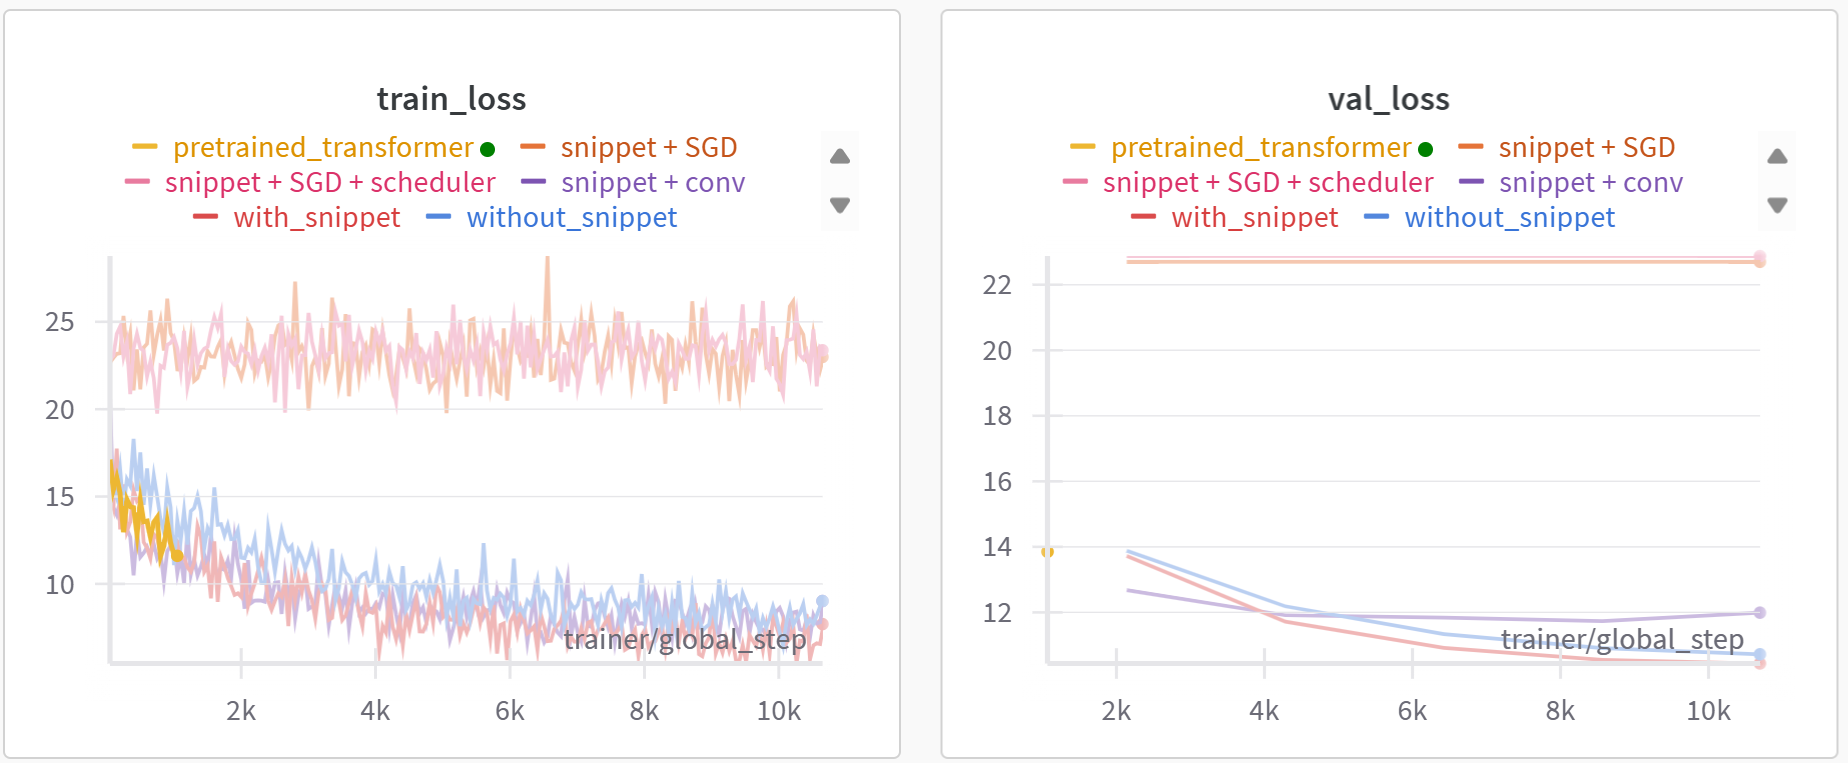-
-
-

In [33]:
class NewsDataset(Dataset):
    def __init__(self, titles, snippets, targets):
        self.titles = titles
        self.snippets = snippets
        self.targets = targets

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        title = self.titles[idx]
        snippet = self.snippets[idx]
        target = self.targets[idx]

        return title, snippet, target

In [34]:
from transformers import DistilBertTokenizer, DistilBertModel
from transformers import AutoTokenizer, AutoModel

class TransformerClassifier(nn.Module):

    def __init__(self, model_name, output_dim):
        super().__init__()
        self.model = DistilBertModel.from_pretrained(model_name)
        self.fc = nn.Linear(self.model.config.hidden_size * 2, output_dim)

    def forward(self, input_ids_title, attention_mask_title, input_ids_snippet, attention_mask_snippet):

        # эмбеддинги
        title_output = self.model(input_ids=input_ids_title, attention_mask=attention_mask_title)
        snippet_output = self.model(input_ids=input_ids_snippet, attention_mask=attention_mask_snippet)

        # cls-токен для представления
        title_cls = title_output.last_hidden_state[:, 0, :]
        snippet_cls = snippet_output.last_hidden_state[:, 0, :]

        return self.fc(torch.cat((title_cls, snippet_cls ), dim = 1))

In [35]:
class TrainLightningModule_Pretrained(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, encoded_titles, encoded_snippets):
        return self.model(
            input_ids_title=encoded_titles["input_ids"],
            input_ids_snippet=encoded_snippets["input_ids"],

            attention_mask_title=encoded_titles["attention_mask"],
            attention_mask_snippet=encoded_snippets["attention_mask"],
        )

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.forward(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.forward(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [36]:
def collate_fn(batch):
    titles, snippets, targets = zip(*batch)

    # токенизация + паддинг
    tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)
    encoded_titles = tokenizer(
        list(titles), padding=True, truncation=True, max_length=20, return_tensors="pt"
    )
    encoded_snippets = tokenizer(
        list(snippets), padding=True, truncation=True, max_length=30, return_tensors="pt"
    )

    # one-hot encoding
    targets_ohe = torch.zeros((len(targets), CLASSES_NUM))
    for i, t in enumerate(targets):
        targets_ohe[[i]*len(t), t] = 1.0

    return encoded_titles, encoded_snippets, targets_ohe

In [37]:
train_dataset_new = NewsDataset(df_train.title_clean.values, df_train.snippet_clean.values, df_train.target_tags.values)
val_dataset_new = NewsDataset(df_val.title_clean.values, df_val.snippet_clean.values, df_val.target_tags.values)
test_dataset_new = NewsDataset(df_test.title_clean.values, df_test.snippet_clean.values, df_test.target_tags.values)

train_dataloader_new = DataLoader(train_dataset_new, shuffle=True, batch_size=128, collate_fn=collate_fn, num_workers=4)
val_dataloader_new = DataLoader(val_dataset_new, shuffle=False, batch_size=1024, collate_fn=collate_fn, num_workers=4)
test_dataloader_new = DataLoader(test_dataset_new, shuffle=False, batch_size=1024, collate_fn=collate_fn, num_workers=4)

MODEL_NAME = "distilbert-base-uncased"
EPOCHS = 1
CLASSES_NUM = len(idx2tag)
LR = 2e-5

model_pretrained = TransformerClassifier(MODEL_NAME, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_pretrained = TrainLightningModule_Pretrained(model_pretrained, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_pretrained, train_dataloader_new, val_dataloader_new)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: ivkoryakov_1 (ivkoryakov_1-hse). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                  | Params | Mode 
------------------------------------------------------------
0 | model     | TransformerClassifier | 68.8 M | train
1 | criterion | CrossEntropyLoss      | 0      | train
------------------------------------------------------------
68.8 M    Trainable params
0         Non-trainable params
68.8 M    Total params
275.184   Total estimated model params size (MB)
3         Modules in train mode
92        Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [38]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▆▇▆▃▅▅▅▃▅▃▄▂▃▄▁▂▃▂▁▁
trainer/global_step,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▇▇███
val_loss,▁
epoch,0
train_loss,11.60572
trainer/global_step,1069
val_loss,13.85315


Будем прогонять тестовую выборку по частям, так как иначе коллаб не вывозит.

In [41]:
from tqdm import tqdm

preds = []
targets = []

with torch.no_grad():
    for test_batch in tqdm(test_dataloader_new):
        encoded_titles, encoded_snippets, target = test_batch
        target = target.to(device)

        logits = model_pretrained(
            input_ids_title=encoded_titles["input_ids"],
            input_ids_snippet=encoded_snippets["input_ids"],

            attention_mask_title=encoded_titles["attention_mask"],
            attention_mask_snippet=encoded_snippets["attention_mask"],
        )

        pred_prob = F.softmax(logits, dim=1)

        preds.append(pred_prob)
        targets.append(target)

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 20/20 [17:36<00:00, 52.84s/it]


**Так как я не успевал, то мне пришлось обучать трансформер на 1 эпохе, чтобы хотябы показать, что он работает.**

Сравните все обученные модели между собой на тестовой выборке.

In [43]:
TRESHOLD = 0.13 # оптимальный для двух лучших моделей

In [52]:
pred_prob, target = get_predict(train_module, test_dataset)

y_pred = 1*(pred_prob > TRESHOLD)

print('Defaul model')
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Defaul model
Exact Match: 0.9985975623130798
Precision: 0.5797100067138672
Recall: 0.4538629353046417


In [53]:
pred_prob, target = get_predict_snippet(train_module_snippet, test_dataset_snippet)

y_pred = 1*(pred_prob > TRESHOLD)

print('Defaul model with snippet')
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Defaul model with snippet
Exact Match: 0.9986122250556946
Precision: 0.6001283526420593
Recall: 0.4593324363231659


In [67]:
pred_prob, target = get_predict_snippet(train_module_snippet_conv, test_dataset_snippet)

y_pred = 1*(pred_prob > TRESHOLD)

print('Conv model with snippet')
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Conv model with snippet
Exact Match: 0.9984403848648071
Precision: 0.5128650665283203
Recall: 0.37878793478012085


In [76]:
pred_prob, target = get_predict_snippet(train_module_snippet_SGD, test_dataset_snippet)

y_pred = 1*(pred_prob > TRESHOLD)

print('SGD + sceduler model with snippet')
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

SGD + sceduler model with snippet
Exact Match: 0.9983149170875549
Precision: 0.0
Recall: 0.0


In [46]:
recalls = []
precisions = []
exact_matches = []
for i in range(len(preds)):
    y_pred_i = 1*(preds[i] > TRESHOLD)
    target_i = targets[i].to('cpu')

    recalls.append(recall(target_i, y_pred_i))
    precisions.append(precision(target_i, y_pred_i))
    exact_matches.append(exact_match(target_i, y_pred_i))

In [47]:
print('Pretrained transformer module')
print('Exact Match:', np.mean(exact_matches))
print('Precision:', np.mean(precisions))
print('Recall:', np.mean(recalls))

Pretrained transformer module
Exact Match: 0.9981974601745606
Precision: 0.22592610791325568
Recall: 0.138914367929101


**Вывод:** Лучшей оказалась обычная модель со снипеттами.

## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_vk.title_clean.values))

In [61]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]

df_vk_dataset = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_vk.snippet_clean.values, MAX_SNIPPET_LEN)

pred_prob_vk, target_vk = get_predict_snippet(train_module_snippet, df_vk_dataset)

y_pred_vk = 1*(pred_prob_vk > 0.13) # оптимальный threshold из прошлого задания

In [62]:
predicted_tags = []
for prediction in y_pred_vk:
    predicted_indices = np.where(prediction == 1)[0]
    predicted_tags.append([list(target_tags)[i] for i in predicted_indices])
print(predicted_tags)

[['украина', 'в мире'], [], [], ['сша'], [], [], [], ['россия', 'сша'], [], ['спорт'], ['тесты'], [], ['россия', 'карикатуры'], [], ['сша'], [], [], ['карикатуры'], ['россия', 'сша'], [], [], ['россия', 'карикатуры'], ['россия'], [], ['россия'], ['спорт'], ['россия'], ['россия'], ['тесты'], ['россия', 'тесты'], [], ['россия'], ['россия'], ['карелия'], ['россия', 'спорт'], ['сша'], ['россия'], [], ['сша', 'китай'], [], ['украина'], ['сша'], ['война в сирии', 'сирия'], [], ['в мире'], [], ['россия'], [], ['сша'], ['украина'], ['россия', 'карикатуры'], ['тесты'], ['россия'], [], [], ['россия', 'карикатуры'], ['москва'], [], [], ['россия'], [], ['экономика', 'авто'], ['япония'], [], ['россия', 'риа наука'], [], ['россия'], [], [], ['россия', 'в мире'], [], ['россия'], ['россия', 'япония'], ['тесты'], ['религия и мировоззрение', 'патриарх кирилл (владимир гундяев)'], ['спорт'], ['россия', 'сша'], ['карикатуры'], [], [], [], ['тесты'], ['карикатуры'], ['россия'], ['россия', 'украина'], [], [

In [63]:
df_vk['target_tags'] = predicted_tags
df_vk

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[украина, в мире]"
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,[]
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,[]
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,[сша]
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,[]
...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,[россия]
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,[россия]
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,[]
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,[сша]


Получилось мало тэгов, но зато они очень точные)

На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [66]:
df_vk.to_csv('df_vk_predicted.csv', index=False)

## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [ ]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?
2. Как выглядит архитектура модели? Насколько модель большая?
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

Установим библиотеку. 🤗🤗🤗

In [ ]:
!pip3 install transformers

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [83]:
from transformers import pipeline
model = pipeline(model="seara/rubert-tiny2-russian-sentiment", device=device, truncation=True)

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
print(model.model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-

**Ответ:**

1) Seara

2) Архитектура модели приведена выше: она основана на модели BertForSequenceClassification, использует полносвязные слои, BatchNorm, Droupout, в конце выдает вероятный из трех классов. Я бы не сказал, что модель большая, так как она использует не так как она состоит всего из 3 layers.

3) Эта модель была обучена на объединении следующих наборов данных:

Kaggle Russian News Dataset (новости на русском языке)

Linis Crowd 2015 and 2016 (тональный словарь)

RuReviews (набор данных с отзывами)

RuSentiment (набор данных, ориентированный на анализ настроения)

Мне кажется, что модель, обученную на таком сочетании данных, адекватно использовать для классификации комментариев ВК, но она скорее всего будет менее эффективна в случаях, когда в комментариях присутствуют сленг и жаргон, которые часто наблюдаются в комментариях ВК, а в отзывах, на которых модель обучалась - редко. Также в комментариях ВК очень много ругательств, некоторые из которых не охватываются данными обучения.

Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [ ]:
comments = df_comments['text'][:20].tolist()
result = model(comments)

In [ ]:
for i in range(20):
    print(comments[i], result[i])

ЧВК Вагнера? {'label': 'neutral', 'score': 0.9122462868690491}
[id4710641|Евгений], выздоравливай. {'label': 'neutral', 'score': 0.8793703317642212}
[id442655034|Андрей], искренне желаю этого всей фабрике. {'label': 'positive', 'score': 0.6762611865997314}
Опять про Украину новости? {'label': 'neutral', 'score': 0.9259392023086548}
Че такое ДНР? {'label': 'neutral', 'score': 0.866222620010376}
[id109937745|Илья], Донецкая Народная Республика !!!! {'label': 'neutral', 'score': 0.8428511023521423}
[id89551382|Юрий], это где? {'label': 'neutral', 'score': 0.924575924873352}
[id109937745|Илья], Донецкая Народная Республика. {'label': 'neutral', 'score': 0.9119594693183899}
[id483059794|Марк], Донецк российский отделился что ли в Ростовской области? {'label': 'neutral', 'score': 0.7873875498771667}
[id109937745|Илья], на планете Земля. {'label': 'neutral', 'score': 0.88370281457901}
[id109937745|Илья], {'label': 'neutral', 'score': 0.892345666885376}
Он не выздоровеет, там родовая травма. П

Проверка для самого длинного комментария:

In [ ]:
model(df_comments['text'][df_comments['text'].apply(len).idxmax()])

[{'label': 'negative', 'score': 0.5807172656059265}]

In [86]:
df_comments = pd.read_csv('/content/drive/MyDrive/df_comments_done.csv')
df_comments.head()

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223


## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [87]:
positive_share = len(df_comments[df_comments['sentiment_verdict'] == 'positive'])/len(df_comments)
negative_share = len(df_comments[df_comments['sentiment_verdict'] == 'negative'])/len(df_comments)

print(f'Доля позитивных комментариев = {round(positive_share*100, 1)}%')
print(f'Доля негативных комментариев = {round(negative_share*100, 1)}%')

Доля позитивных комментариев = 7.2%
Доля негативных комментариев = 22.9%


In [ ]:
top_positive_comments = df_comments[df_comments['sentiment_verdict'] == 'positive'].sort_values('sentiment_score', ascending = False).head(10)
top_negative_comments = df_comments[df_comments['sentiment_verdict'] == 'negative'].sort_values('sentiment_score', ascending = False).head(10)
top_positive_comments

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
493792,23095070.0,23094261.0,2018-11-17 11:21:56,"Отлично, молодец!Поздравляю!✨💫🌟💥",0.0,positive,0.996725
1379447,21323499.0,21322970.0,2018-06-20 18:54:40,Отлично! Просто отлично! Молодцы! Поздравляю о...,3.0,positive,0.996674
2352264,18718201.0,18718179.0,2017-11-30 13:22:42,"отлично,молодцы!!!👍 респект",3.0,positive,0.996605
2057938,19643844.0,19640879.0,2018-02-16 08:33:19,Отлично! \nПоздравляем!!!,1.0,positive,0.996536
2074701,19591344.0,19588477.0,2018-02-12 08:25:08,"Отлично,я рад.",0.0,positive,0.996462
236794,23585686.0,23584622.0,2018-12-29 11:48:39,"Отлично,молодцы",2.0,positive,0.996461
1300899,21515168.0,21514312.0,2018-07-06 15:22:04,"Отлично,люблю ездить в Эмираты",0.0,positive,0.996450
288287,23487341.0,23487299.0,2018-12-20 12:34:50,Отлично! Здоровья всем желаю!,8.0,positive,0.996444
411428,23248899.0,23242108.0,2018-11-30 07:31:37,Я очень счастлива! Поздравляю!,0.0,positive,0.996431
1681663,20633834.0,20633609.0,2018-04-25 10:13:42,"Отлично, просто отлично!",0.0,positive,0.996418


__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [88]:
df_comments_grouped = df_comments.groupby(['post_id', 'sentiment_verdict']).size().unstack()
df_comments_grouped = df_comments_grouped.reset_index().fillna(0).astype(int)
df_comments_grouped

sentiment_verdict,post_id,negative,neutral,positive
0,17976037,57,169,12
1,17976198,10,40,1
2,17976601,11,56,0
3,17976766,11,29,8
4,17976905,31,77,4
...,...,...,...,...
19922,24005764,37,93,10
19923,24005972,10,28,2
19924,24006100,4,15,3
19925,24006240,11,28,3


In [102]:
df_vk_merged = pd.merge(df_vk, df_comments_grouped[['post_id',	'negative',	'neutral',	'positive']], how = 'left', left_on = 'id', right_on = 'post_id')
df_vk_merged = df_vk_merged.drop('post_id', axis = 1)
df_vk_merged

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,"[украина, в мире]",10.0,35.0,2.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,[],11.0,28.0,3.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,[],4.0,15.0,3.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,[сша],10.0,28.0,2.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,[],37.0,93.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,[россия],31.0,77.0,4.0
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,[россия],11.0,29.0,8.0
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,[],11.0,56.0,0.0
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,[сша],10.0,40.0,1.0


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

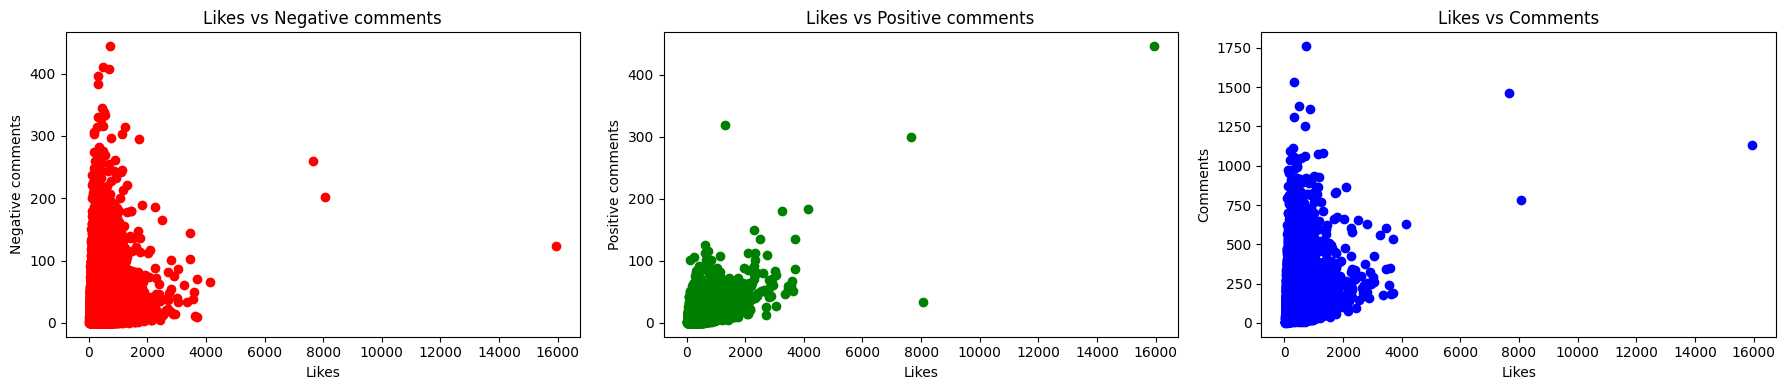

In [ ]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_vk_merged['likes'], df_vk_merged['negative'], color='red')
plt.title('Likes vs Negative comments')
plt.xlabel('Likes')
plt.ylabel('Negative comments')

plt.subplot(1, 3, 2)
plt.scatter(df_vk_merged['likes'], df_vk_merged['positive'], color='green')
plt.title('Likes vs Positive comments')
plt.xlabel('Likes')
plt.ylabel('Positive comments')

plt.subplot(1, 3, 3)
plt.scatter(df_vk_merged['likes'], df_vk_merged['comments'], color='blue')
plt.title('Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')

plt.tight_layout()

plt.show()

In [103]:
corr_likes_negative = df_vk_merged['likes'].corr(df_vk_merged['negative'])
print('Коэффицент корреляции между количеством лайков и количеством негативных комментариев:', round(corr_likes_negative, 2))

corr_likes_positive = df_vk_merged['likes'].corr(df_vk_merged['positive'])
print('Коэффицент корреляции между количеством лайков и количеством позитивных комментариев:', round(corr_likes_positive, 2))

corr_likes_comments = df_vk_merged['likes'].corr(df_vk_merged['comments'])
print('Коэффицент корреляции между количеством лайков и количеством комментариев:', round(corr_likes_comments, 2))

Коэффицент корреляции между количеством лайков и количеством негативных комментариев: 0.1
Коэффицент корреляции между количеством лайков и количеством позитивных комментариев: 0.58
Коэффицент корреляции между количеством лайков и количеством комментариев: 0.21


**Вывод:** По графикам и коэффициентам корреляции видно, что нельзя сказать, что новости с большим количеством лайков получают больше негативных или позитивных комментариев. Но коэффициент корреляции 0,58 говорит о том, что есть заметная положительная связь между количеством лайков и количеством комментариев.

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [104]:
a = 1 + df_vk_merged['positive']
b = 1 + df_vk_merged['neutral'] + df_vk_merged['negative']

df_vk_merged['interval_lower'] = a/(a+b) - 1.65 * np.sqrt(a*b/((a+b)**2 * (a+b+1)))

sorted_news = df_vk_merged.sort_values('interval_lower', ascending = False)[['id', 'href', 'title', 'likes', 'comments', 'negative', 'neutral', 'positive', 'interval_lower', 'target_tags']]
sorted_news.head(10)

,id,href,title,likes,comments,negative,neutral,positive,interval_lower,target_tags
6651,22320852,https://rsport.ria.ru/rhythm_gym/20180913/1141...,Сборная России выиграла командный турнир на че...,1387,53,0.0,16.0,34.0,0.566760,[спорт]
14020,20027260,https://rsport.ria.ru/winter2018_paralympics/2...,"Миленина выиграла биатлонную гонку на 12,5 км,...",1106,28,0.0,8.0,16.0,0.502777,"[паралимпийские игры - пхенчхан 2018, пхенчхан..."
6620,22326485,https://rsport.ria.ru/shooting/20180914/114181...,Россиянки заняли третье место в ските среди юн...,359,14,0.0,4.0,10.0,0.502010,[спорт]
13735,20128079,https://rsport.ria.ru/artist_gym/20180323/1134...,Россиянка Мельникова победила в многоборье на ...,670,17,0.0,4.0,10.0,0.502010,"[спортивная гимнастика, легкая атлетика]"
12529,20591225,https://rsport.ria.ru/hockey/20180422/11358902...,"""Ак Барс"" стал трехкратным обладателем Кубка Г...",1292,78,3.0,26.0,42.0,0.494670,"[хоккей, спорт]"
7572,22073093,/culture/20180824/1527142299.html,"Россиянин Иван Бессонов победил в конкурсе ""кл...",1882,119,3.0,44.0,59.0,0.477024,[]
4968,22783725,https://rsport.ria.ru/olympic_games/20181020/1...,Сборная России вернулась в Москву после победы...,983,54,5.0,15.0,29.0,0.475624,[спорт]
2133,23489272,https://m.vk.com/narrative-15755094_9}?api_vie...,"Ваши поздравления на елке ""Россия Сегодня"" в ГУМе",40,10,0.0,2.0,6.0,0.472020,[россия]
10348,21284685,https://rsport.ria.ru/russia2018_news/20180617...,Сербия обыграла Коста-Рику на ЧМ-2018,713,56,4.0,17.0,29.0,0.464950,"[футбол, новости - чемпионат мира по футболу 2..."
13930,20065831,https://rsport.ria.ru/winter2018_russia/201803...,Вопреки всему: россияне стали вторыми на Парал...,2429,96,4.0,36.0,48.0,0.458303,[]


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__
1) Использовать отложенную выборку, которая состоит из пересечения df_ria и df_vk, для нее есть правильные ответы (tags), и поэтому мы можем достоверно посчитать для каждого тэга среднее значение нижней границы позитивности (interval_lower)

2) Повторить пункт 1, но уже для всего df_vk, используя предсказанные тэги нашей лучшей модели.

In [ ]:
df_oob_new = sorted_news[sorted_news.href.isin(test_hrefs)][['id', 'href', 'title', 'likes', 'comments', 'negative', 'neutral', 'positive', 'interval_lower']]
df_ria_oob_new = df_ria[df_ria.href.isin(test_hrefs)][['href', 'tags']]
df_oob_new = df_oob_new.set_index('href').join(df_ria_oob_new.set_index('href')).reset_index()
df_oob_new

,href,id,title,likes,comments,negative,neutral,positive,interval_lower,tags
0,/20181215/1548049868.html,23435004,"Умер артист из ""Кривого зеркала"" Обид Асомов",268,80,8.0,44.0,23.0,0.225154,культура
1,/20181226/1548712560.html,23550481,"Два брата из Омской области, спасшие людей из ...",1059,55,3.0,35.0,17.0,0.215082,"новый год—2019,москва,омская область,общество"
2,/20181209/1547676844.html,23356167,СМИ сообщили об экстренной госпитализации Льва...,117,75,6.0,47.0,21.0,0.204196,"москва,культура"
3,/20181231/1548944905.html,23600220,Си Цзиньпин поздравил Путина и россиян с Новым...,374,81,14.0,43.0,22.0,0.201789,"новый год—2019,си цзиньпин,владимир путин,кита..."
4,/20181227/1548771006.html,23560019,Путин поздравил сотрудников и ветеранов МЧС с ...,334,72,12.0,38.0,19.0,0.194220,"мчс рф,владимир путин,общество"
...,...,...,...,...,...,...,...,...,...,...
1128,/20181218/1548158267.html,23455192,"Фильм Сергея Дворцевого ""Айка"" вошел в шорт-ли...",84,12,2.0,10.0,0.0,-0.038290,"киноакадемия сша,сша,культура"
1129,/20181225/1548622620.html,23547132,Колонка Виктора Мараховского,61,12,4.0,7.0,0.0,-0.040585,"россия,сша,авторы,в мире"
1130,/20181222/1548483735.html,23512149,Имена погибших в ДРК российских пилотов назову...,50,10,2.0,8.0,0.0,-0.043148,"крушение пассажирского самолета в дрк,в мире"
1131,/20181229/1548887618.html,23583427,Число погибших при сходе лавины в Хабаровском ...,52,8,0.0,8.0,0.0,-0.049248,"хабаровский край,происшествия"


In [ ]:
df_oob_new['tags'] = df_oob_new['tags'].str.split(',')
df_oob_new_tags = df_oob_new.explode('tags')
tags_mean_sentiment = df_oob_new_tags.groupby('tags')['interval_lower'].mean()
sorted_tags_mean_sentiment = tags_mean_sentiment.sort_values(ascending=False)
sorted_tags_mean_sentiment.head(10)

,interval_lower
tags,
си цзиньпин,0.201789
самара,0.190448
александр усик,0.185658
"миа ""россия сегодня""",0.178263
юри луйк,0.154348
липецкая область,0.149419
республика крым,0.140851
иван дорн,0.129732
александр розенбаум,0.121032


**Вывод:** Таким образом, самые позитивные категории новостей - географические локации и знаменитости.

Теперь воспользуемся нашей моделью:

In [110]:
df_vk_merged['target_tags'] = df_vk_merged['target_tags'].apply(lambda x: ', '.join(x))
df_vk_merged['target_tags'] = df_vk_merged['target_tags'].str.split(',')
df_vk_merged_tags = df_vk_merged.explode('target_tags')
tags_mean_sentiment = df_vk_merged_tags.groupby('target_tags')['interval_lower'].mean()
sorted_tags_mean_sentiment = tags_mean_sentiment.sort_values(ascending=False)
sorted_tags_mean_sentiment.head(10)

,interval_lower
target_tags,
паралимпизм,0.502777
сборная россии - пхенчхан 2018,0.502777
спортивная гимнастика,0.502010
фигурное катание,0.382096
регби,0.321872
художественная гимнастика,0.321447
пхенчхан 2018,0.320598
паралимпийские игры - пхенчхан 2018,0.320598
чемпионат мира по хоккею 2018,0.312565


**Вывод:** Таким образом, самые позитивные категории новостей - спорт (в основном зимняя олимпиада 2018).

__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
df_merged = pd.merge(df_comments, df_vk[['id', 'comments']], how = 'left', left_on = 'post_id', right_on = 'id')
df_merged = df_merged.rename(columns={'id_x': 'id'})
df_merged = df_merged.drop('id_y', axis=1)

In [ ]:
df_merged

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score,comments
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246,28
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370,28
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261,28
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939,28
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223,28
...,...,...,...,...,...,...,...,...
2612624,17991829.0,17976037.0,2017-09-30 10:27:11,"Сергей, я про простых американцев, которые слу...",0.0,neutral,0.649754,241
2612625,17992004.0,17976037.0,2017-09-30 10:49:21,"[id415883695|Евгений], у них довольствие и они...",0.0,negative,0.697936,241
2612626,17992058.0,17976037.0,2017-09-30 10:56:29,"[id142882974|Сергей], ну Кадафи и Хусейныча он...",0.0,negative,0.623313,241
2612627,17992487.0,17976037.0,2017-09-30 11:56:03,"[id142882974|Сергей], для этого существует физ...",0.0,neutral,0.873600,241


In [ ]:
df_merged_negative = df_merged[df_merged['sentiment_verdict'] == 'negative']
df_merged_negative.head(10)

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score,comments
14,24006399.0,24006362.0,2019-02-01 23:26:52,"[id109937745|Илья], привет жителям Окраины! Ка...",1.0,negative,0.791067,28
16,24006404.0,24006362.0,2019-02-01 23:28:27,"[id4710641|Евгений], а с чего это бюджетные де...",1.0,negative,0.579184,28
17,24006405.0,24006362.0,2019-02-01 23:28:38,"[id98684712|Андрей], ну да, только особо ничег...",1.0,negative,0.899649,28
26,24006419.0,24006362.0,2019-02-01 23:32:24,"[id281789680|Едыге], одного из раненых в очко",1.0,negative,0.482806,28
32,24006443.0,24006362.0,2019-02-01 23:40:05,Для путина и его шайки воров восстание русског...,0.0,negative,0.899264,28
35,24006448.0,24006362.0,2019-02-01 23:42:27,"фу таким быть, олежка. Путина только позоришь.",0.0,negative,0.747319,28
36,24006471.0,24006362.0,2019-02-01 23:53:49,"[id109937745|Илья], Возле хохляндии....😉",0.0,negative,0.519083,28
37,24006480.0,24006362.0,2019-02-01 23:57:06,У тебя хохлизм головного мозга тебе лечиться н...,0.0,negative,0.655585,28
45,24006510.0,24006362.0,2019-02-02 00:11:35,Хватит воевать уже другая формация людей идёт ...,0.0,negative,0.608371,28
46,24006515.0,24006362.0,2019-02-02 00:15:14,"[id4710641|Евгений], новость открой а потом ку...",0.0,negative,0.696022,28


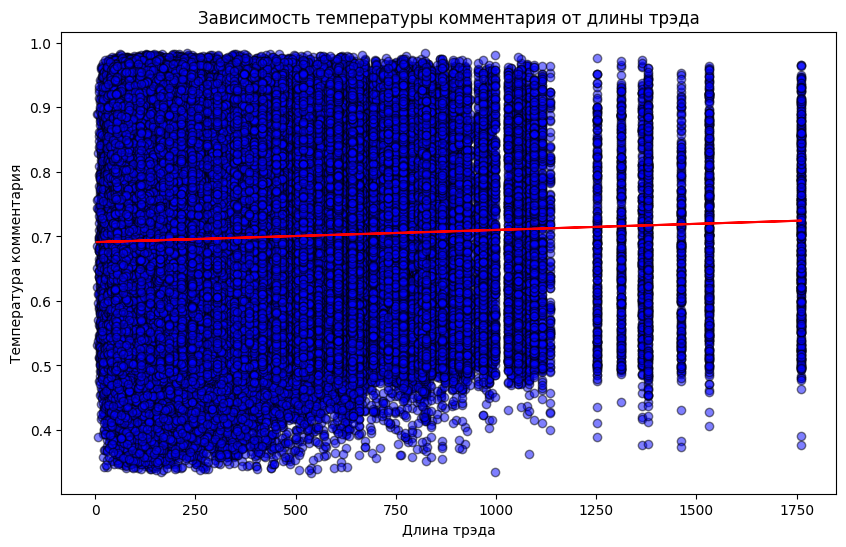

In [ ]:
import statsmodels.api as sm

X = df_merged_negative['comments']
y = df_merged_negative['sentiment_score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

plt.figure(figsize=(10, 6))

plt.scatter(df_merged_negative['comments'], df_merged_negative['sentiment_score'], color = 'blue', alpha = 0.5, edgecolors = 'black')
plt.plot(df_merged_negative['comments'], model.predict(X), color='red')

plt.title('Зависимость температуры комментария от длины трэда')
plt.xlabel('Длина трэда')
plt.ylabel('Температура комментария')

plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     478.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          6.50e-106
Time:                        17:40:50   Log-Likelihood:             3.5365e+05
No. Observations:              597766   AIC:                        -7.073e+05
Df Residuals:                  597764   BIC:                        -7.073e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6912      0.000   2470.062      0.0

**Вывод:** коэффицент линейной регрессии при переменной comments = *1.889e-05*, следовательно, положительная связь между температурой комментария и длины трэда крайне мала, но она значима на любом разумном уровне значимости, так как p-value практически равно 0. Также у нашей модели очень низкий показатель R^2, то есть она объясняет малую долю вариации зависимой переменной.